In [49]:
import pandas as pd
import json
import numpy as np
from collections import Counter

In [7]:
human = pd.read_csv("../human_eval_gpt4o_vs_cascade/manual_label_20250219.csv", header=None)
column_names = ["id", "judge_context", "judge_voice", "human_context", "human_voice"]  # Modify as needed
human.columns = column_names
human = list(human['human_voice']) # keep only the voice column

In [34]:
def read_verdicts(path, N=82):
    preds = []
    candidate_winrate = []
    for i in range(N):
        # path = ../../eval-leaderboard/judge_outputs/advvoiceq1_v4/judge_gpt4o_prompt1.1_candidate_asrllamatts
        with open(f"{path}/{i}.txt") as f:
            x = json.load(f)
        response = x['response']
        ref_model_type = x['ref_model_type']
        verdict = response.split("[Verdict]")[-1].strip("```").strip("json").strip("python").strip()
        parsed = json.loads(verdict)
        if parsed['verdict'] == 'tie':
            pred = 'tie'
            candidate_winrate += [0.5]             
        elif parsed['verdict'] == 'tie_bad':
            pred = 'tie_bad'
            candidate_winrate += [0.5] 
        elif parsed['verdict'] in ['model_1', 'model_2']:
            if parsed['verdict'] == 'model_1' and ref_model_type == 'model_1':
                pred = 'A'
                candidate_winrate += [0] 
            elif parsed['verdict'] == 'model_1' and ref_model_type == 'model_2':
                pred = 'B'
                candidate_winrate += [1] 
            elif parsed['verdict'] == 'model_2' and ref_model_type == 'model_1':
                pred = 'B'
                candidate_winrate += [1] 
            elif parsed['verdict'] == 'model_2' and ref_model_type == 'model_2':
                pred = 'A'
                candidate_winrate += [0] 
        else:
            raise Exception()
        preds.append(pred)
    print("CandidateWinRate: {:.2f}%".format( np.mean(candidate_winrate) * 100))
    return preds

In [64]:
preds = read_verdicts("../../eval-leaderboard/judge_outputs/advvoiceq1_v4/judge_gpt4o_prompt1.1_candidate_asrllamatts")

CandidateWinRate: 34.15%


In [65]:
preds = read_verdicts("../../eval-leaderboard/judge_outputs/advvoiceq1_v4/judge_gpt4o_prompt1.1_candidate_gpt4o")

CandidateWinRate: 46.95%


In [66]:
preds = read_verdicts("../../eval-leaderboard/judge_outputs/advvoiceq1_v4/judge_gpt4o_prompt1.1_candidate_4okokoro/")

CandidateWinRate: 29.88%


In [67]:
preds = read_verdicts("../../eval-leaderboard/judge_outputs/advvoiceq1_v4/judge_gpt4o_prompt1.1_candidate_gemini2flashaudio")

CandidateWinRate: 24.39%


In [69]:
preds = read_verdicts("../../eval-leaderboard/judge_outputs/advvoiceq1_v4/judge_gpt4o_prompt1.1_candidate_gemini2flashtranscriptkokoro")

CandidateWinRate: 23.78%


In [ ]:
preds = read_verdicts("../../eval-leaderboard/judge_outputs/advvoiceq1_v4/judge_gpt4o_prompt1.1_candidate_gemini2flashtranscriptkokoro")

In [51]:
print(Counter(human))
print(Counter(preds))

Counter({'A': 59, 'tie_bad': 19, 'tie': 3, 'B': 1})
Counter({'A': 43, 'B': 17, 'tie_bad': 16, 'tie': 6})


In [174]:
62 / 82

0.7560975609756098

In [176]:
count_good, count = 0, 0
for pred, label in zip(preds, human):
    if label != 'A':
        continue
    if pred == label:
        count_good += 1
    count += 1
    # print(f"{pred:<6}\t{label:<6}")
    # print("-----------------------------")
print("Percentage: {:.2f}%".format(count_good / count * 100))

Percentage: 64.41%


# Plot

In [147]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [168]:
model_names = [
    "GPT-4o-Audio",
    "GPT-4o-Audio (→Transcript+TTS)",
    "Gemini-2.0-Flash",
    "Gemini-2.0-Flash (→Transcript+TTS)",

    "ASR+Llama3+TTS",
    
    "Gemini-2.0-Flash(Text)+TTS",
    "GPT-4o(Text)+TTS",
    "DiVA+TTS",
    "Typhoon2-Audio+TTS",
    "Qwen2-Audio+TTS",


    "Typhoon2-Audio",
    "Llama-Omni",
    "Moshi",
    
]

# colors = [
#     "C0", "C0", "C0", "C0", 
#     "C3",
#     "C2", "C2", "C2",  "C2", "C2",
#     "C1", "C1", "C0",
# ]
colors = [
    "navy", "cornflowerblue", "navy", "cornflowerblue", 
    "cornflowerblue",
    "cornflowerblue", "cornflowerblue", "cornflowerblue",  "cornflowerblue", "cornflowerblue",
    "navy", "navy", "navy",
]


winrate = [
    46.95,
    29.88,
    24.39,
    23.78,
    
    34.15,
    
    34.15,
    26.83,
    29.88,
    18.90,
    18.29,
    


    20.12,
    13.41,
    4.27,
]

In [161]:
# # Plot
# # plt.figure(figsize=(12, 6))
# # plt.barh(model_names, winrate, color=colors)
# fig, ax = plt.subplots(figsize=(12, 6))
# bars = ax.barh(model_names, winrate, color=colors)

# plt.xlabel("WinRate-P4 (%)")
# # plt.ylabel("Model")
# plt.title("WinRate for Models")
# plt.gca().invert_yaxis()  # Invert y-axis to show highest winrate at the top
# plt.grid(axis='x', linestyle='--', alpha=0.7)

# # Apply hatching (patterns) to the specified bars
# bars[1].set_hatch("//")
# bars[3].set_hatch("//")

# # Define legend items manually
# legend_labels = {
#     "E2E (w/ Acoustic)": "C0",
#     "E2E (wo/ Acoustic)": "C1",
#     "S2T + TTS": "C2",
#     "ASR+LLM+TTS": "C3",
    
# }

# # Create legend handles
# legend_handles = [mpatches.Patch(color=color, label=label) for label, color in legend_labels.items()]
# plt.legend(handles=legend_handles, title="Model Type")

# # Manually control xticks
# xtick_values = [0, 20, 40]  # Customize tick positions
# plt.xticks(xtick_values, labels=[str(x) + "%" for x in xtick_values])  # Customize labels

# # Show plot
# # plt.show()
# # plt.savefig("winrate_chart.pdf", format="pdf", bbox_inches="tight")

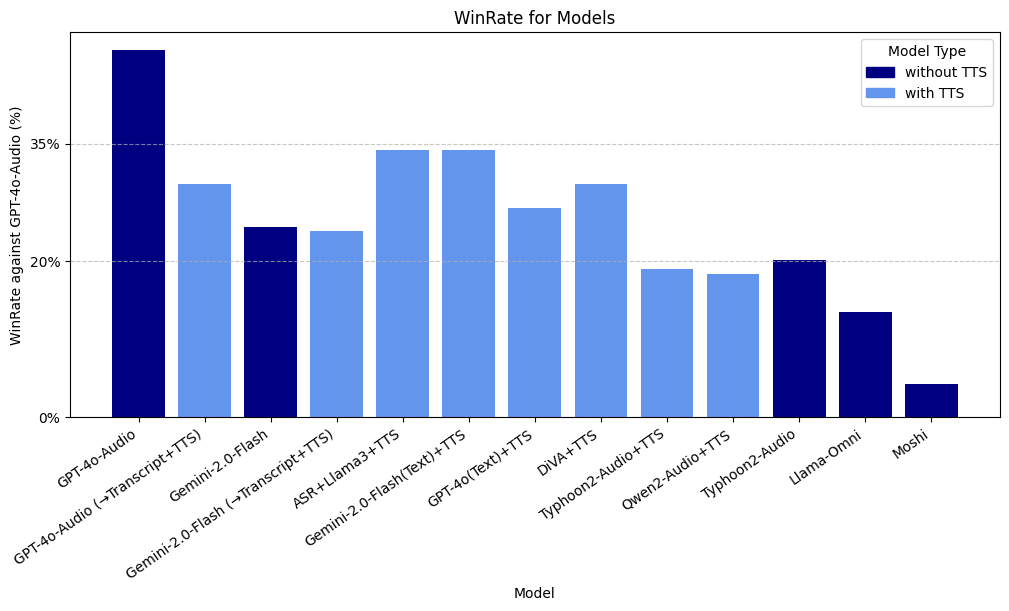

In [180]:
# Create figure
fig, ax = plt.subplots(figsize=(12, 5))

# Plot vertical bars
bars = ax.bar(model_names, winrate, color=colors)

# Apply hatching (patterns) to the specified bars
# bars[1].set_hatch("//")
# bars[3].set_hatch("//")

# Labels and title
ax.set_ylabel("WinRate against GPT-4o-Audio (%)")
ax.set_xlabel("Model")
ax.set_title("WinRate for Models")
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis labels
plt.xticks(rotation=35, ha="right")

# Define legend items manually
# legend_labels = {
#     "E2E (w/ Acoustic)": "C0",
#     "E2E (wo/ Acoustic)": "C1",
#     "S2T + TTS": "C2",
#     "ASR+LLM+TTS": "C3",
# }
legend_labels = {
    "without TTS": "navy",
    "with TTS": "cornflowerblue",
}

# Create legend handles
legend_handles = [mpatches.Patch(color=color, label=label) for label, color in legend_labels.items()]
plt.legend(handles=legend_handles, title="Model Type")

# Manually control yticks
ytick_values = [0, 20, 35]  # Customize tick positions
plt.yticks(ytick_values, labels=[str(x) + "%" for x in ytick_values])  # Customize labels

# Show plot
# plt.show()

# Save as PDF
plt.savefig("winrate_chart.pdf", format="pdf", bbox_inches="tight")